# Representing Mazes for GridMaze experiments
@peterdoohan

First let's add a project folder that contains GridMaze code to the system path so we can access it easily. Note you could also copy/git clone the GridMaze folder from the path below somewhere else if you like. 

In [108]:
import sys

PROJECT_CODE_PATH = "/ceph/behrens/peter_doohan/goalNav_mFC/experiment/code"
sys.path.append(PROJECT_CODE_PATH)

Now we can access the ```GridMaze.maze``` module for generating mazes in code and plotting them

In [109]:
# import packages we need for this mini tutorial
import json
import networkx as nx
from matplotlib import pyplot as plt
from GridMaze.maze import representations as mr

In [110]:
# Global variables
from GridMaze.paths import EXPERIMENT_INFO_PATH

with open(EXPERIMENT_INFO_PATH / "maze_configs.json") as input_file:
    MAZE_CONFIGS = json.load(input_file)

with open(EXPERIMENT_INFO_PATH / "maze_measurements.json") as input_file:
    MAZE_MEASURMENTS = json.load(input_file)

## Representing Mazes

Mazes are defined on disk (& in pycontrol hardward/code) as lists of edges as human readable strings. These representations are stored on disk in a ```maze_configs.json``` file for this experiment. We also have information about the dimensions of the maze stored in a ```maze_measurements.json``` file. Altohugh for big maze eperiments the dimensions are always 7x7. 

In [111]:
maze_1 = MAZE_CONFIGS["maze_1"]["structure"]
print(maze_1)
print(MAZE_MEASURMENTS["maze_node_dimensions"])

['A1-A2', 'A3-A4', 'A4-A5', 'A5-A6', 'A6-A7', 'A2-B2', 'A3-B3', 'A5-B5', 'A7-B7', 'B4-B5', 'B6-B7', 'B1-C1', 'B2-C2', 'B3-C3', 'B6-C6', 'C1-C2', 'C2-C3', 'C3-C4', 'C4-C5', 'C5-C6', 'C6-C7', 'C2-D2', 'C5-D5', 'C7-D7', 'D1-D2', 'D3-D4', 'D4-D5', 'D6-D7', 'D1-E1', 'D2-E2', 'D3-E3', 'D4-E4', 'D5-E5', 'D6-E6', 'E2-F2', 'E3-F3', 'E5-F5', 'E6-F6', 'E7-F7', 'F1-F2', 'F2-F3', 'F4-F5', 'F6-F7', 'F2-G2', 'F5-G5', 'F6-G6', 'G1-G2', 'G2-G3', 'G3-G4', 'G4-G5', 'G5-G6', 'G6-G7']
[7, 7]


This is nice representations for humans to understand but not so good for doing anything useful in code. Luckily, the python networkx package makes it super east to represent graphs in code. We use the nx.grid_2d_graph function to build nextworkx graph objects from their string representation (function: mr.simple_maze()). These objects have node and edge named as coordinate tuples (see below). We then append "labels" and "positions" to each node and edge (that represent towers and bridges, repectively). These are their alphaneumeric label (eg, "A1" or "A1-A2") and their x,y position in space (eg 0.15m, 0.15m). These networkx attributes can be accessed as dictionaries and are useful for translating between different naming conventions. 

In [112]:
# map from string to networkx object
simple_maze = mr.simple_maze(maze_1)

# these networkx graphs are build from the function nx.grid_2d_graph
print("Defualt network x grid graph node and edge names:")
print(f"Nodes: {list(simple_maze.nodes())[:10]}")
print(f"Edges: {list(simple_maze.edges())[:5]}")

Defualt network x grid graph node and edge names:
Nodes: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 0), (1, 1), (1, 2)]
Edges: [((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 2), (0, 3)), ((0, 2), (1, 2)), ((0, 3), (0, 4))]


In [113]:
# simple_maze networkx objects have two useful attributes: labels and positions
coord2label = nx.get_node_attributes(simple_maze, "label")
coord2pos = nx.get_node_attributes(simple_maze, "position")

print("Labels and positions of nodes:")
print(f"Labels: {list(coord2label.items())[:1]}")
print(f"Positions: {list(coord2pos.items())[:1]}")

Labels and positions of nodes:
Labels: [((0, 0), 'A1')]
Positions: [((0, 0), (0.15, 0.15))]


This is the main maze repesentation use in code and we refer to it as the "simple_maze" representation. Here, towers are nodes on the graph and bridges are edges between nodes. 

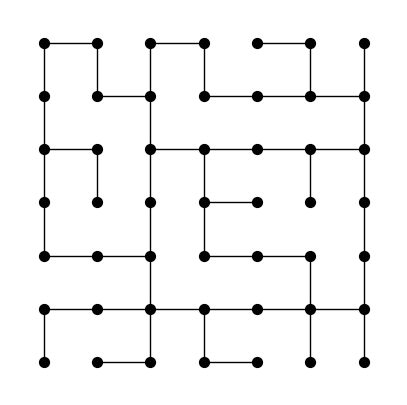

In [114]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis("off")
nx.draw_networkx(simple_maze, pos=coord2pos, with_labels=False, node_size=50, node_color="k", ax=ax)

We have another maze representation called the "extended_simple_maze" where now both towers and bridges on the maze are nodes on the graph. This representation is useful for certain analyses. 

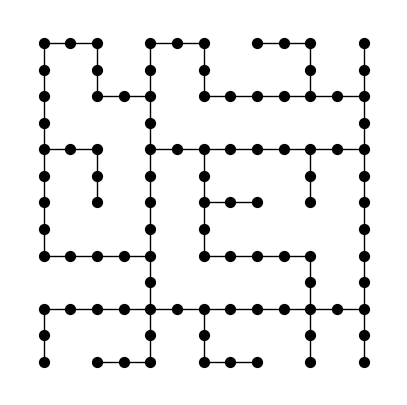

In [115]:
extended_maze = mr.get_extended_simple_maze(simple_maze)
ex_coord2pos = nx.get_node_attributes(extended_maze, "position")

f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis("off")
nx.draw_networkx(extended_maze, pos=ex_coord2pos, with_labels=False, node_size=50, node_color="k", ax=ax)

Further, we have one more representation of the maze which is called the "skeleton_maze". This representationhas 5 nodes per tower and 3 nodes per bridge. This representation is useful for analyses where you need higher resolution that just towers and bridges. 

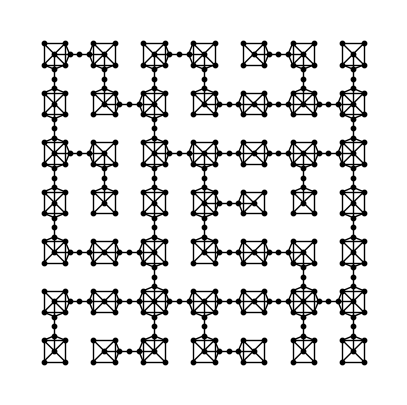

In [116]:
skeleton_maze = mr.skeleton_maze(maze_1)
sk_coord2pos = nx.get_node_attributes(skeleton_maze, "position")

f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis("off")
nx.draw(
    skeleton_maze,
    pos=sk_coord2pos,
    with_labels=False,
    node_size=10,
    node_color="k",
    ax=ax,
)

## Plotting Mazes

We also have some useful code for plotting things on mazes :)

We can just plot a maze silhouette that looks like the real mazes:

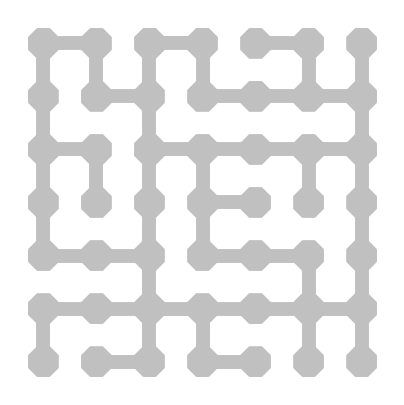

In [117]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
mp.plot_simple_maze_silhouette(simple_maze, ax=ax, color="silver")

We also have code for plotting classic spatial heatmaps, node-edge heatmaps and directed heatmaps on mazes. Don't worry about the code for getting the data for the plotting yet, we will go into this in another tutorial. 

In [118]:
# get some data for plotting
from GridMaze.maze import plotting as mp
from GridMaze.analysis.core import get_clusters as gc
from GridMaze.analysis.cluster_tuning import spatial

cluster_unique_ID = "m6.2022-07-05.maze_cluster6"
Cluster = gc.get_cluster(cluster_unique_ID)
pos, spikes, simple_maze = Cluster.load_tuning_data(feature="spatial")
simple_maze, place_tuning = Cluster.load_tuning_data(feature="place")
simple_maze, place_direction_tuning = Cluster.load_tuning_data(feature="place_direction")

Text(0.5, 1.0, 'Place Direction Tuning')

findfont: Font family 'Courier' not found.
findfont: Font family 'Courier' not found.
findfont: Font family 'Courier' not found.
findfont: Font family 'Courier' not found.
findfont: Font family 'Courier' not found.
findfont: Font family 'Courier' not found.


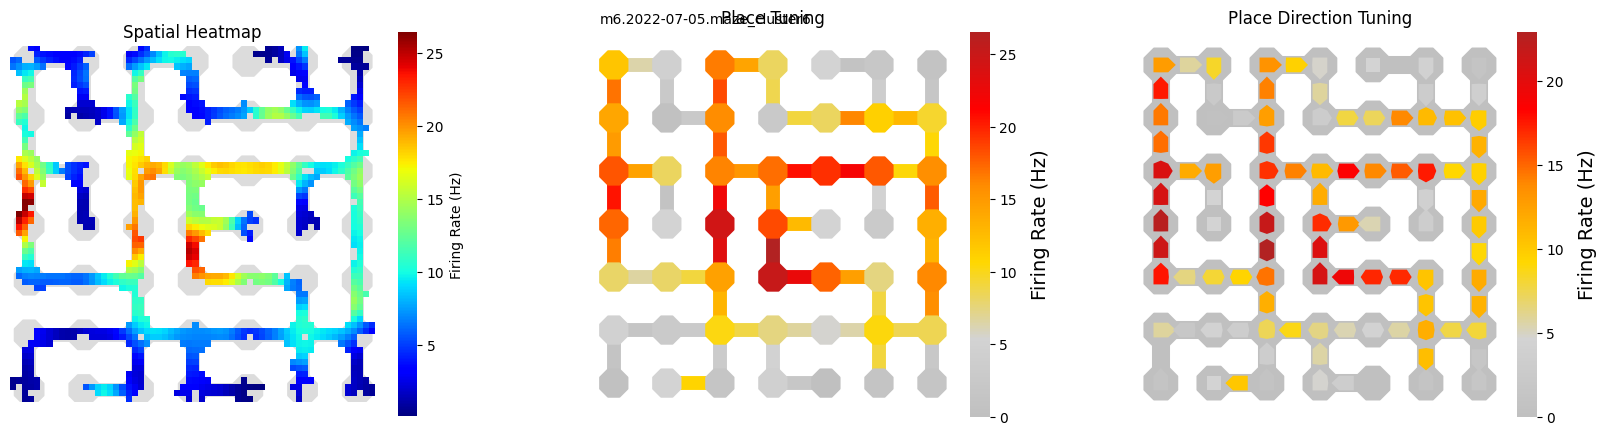

In [119]:
# plot
f, axes = plt.subplots(1, 3, figsize=(20, 5))
spatial.plot_spatial_heatmap(pos, spikes, simple_maze, ax=axes[0])
axes[0].set_title("Spatial Heatmap")
spatial.plot_place_tuning(simple_maze, place_tuning, ax=axes[1])
axes[1].set_title("Place Tuning")
spatial.plot_place_direction_tuning(simple_maze, place_direction_tuning, ax=axes[2])
axes[2].set_title("Place Direction Tuning")

Note, all you need to pass into the place or place_direction plotting functions are pandas Series with index as nodes and edge labels and the simple_maze networkx objects. 

In [120]:
print(place_tuning)

A1        0.446232
A1-A2     1.284047
A2        4.769112
A2-B2     1.426018
A3        8.046531
           ...    
G5       15.690381
G5-G6    10.500053
G6        9.508578
G6-G7     1.859134
G7        0.918569
Name: m6.2022-07-05.maze_cluster6, Length: 101, dtype: float64


In [121]:
print(place_direction_tuning)

maze_position  direction
A1             N             0.915347
A1-A2          N             0.156697
               S                  NaN
A2             E             5.765439
               S                  NaN
                              ...    
G6             S            22.024327
               W             6.233288
G6-G7          N             0.376762
               S             7.096845
G7             S             0.918569
Name: m6.2022-07-05.maze_cluster6, Length: 208, dtype: float64
